In [6]:
%load_ext autoreload
%autoreload 2

from synference import SBI_Fitter, generate_constant_R
from unyt import um
from astropy.io import fits
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
fitter = SBI_Fitter.init_from_hdf5(
    "Spectra_BPASS_Chab_Continuity_SFH_0.01_z_14_logN_4.4_Calzetti_v4_multinode",
    "/cosma7/data/dp276/dc-harv3/work/sbi_grids/grid_spectra_BPASS_Chab_Continuity_SFH_0.01_z_14_logN_4.4_Calzetti_v4_multinode.hdf5"
)

In [17]:
tab = fits.getdata('/cosma/apps/dp276/dc-harv3/synference/priv/jwst_nirspec_prism_disp.fits')
wavs = tab['WAVELENGTH'] * um
R = tab['R']

In [14]:
fitter.create_feature_array(flux_units="log10 nJy", crop_wavelength_range=(0.6, 5.0), resample_wavelengths=wavs, inst_resolution_wavelengths=wavs, inst_resolution_r=R, theory_r=np.inf)

2025-10-05 23:50:14,756 | synference | INFO     | Redshift detected. Transforming spectra to observed frame.


Transforming spectra: 100%|██████████| 25000/25000 [08:37<00:00, 48.32it/s]


2025-10-05 23:58:52,417 | synference | INFO     | Spectra feature array created with shape (25000, 1001).
2025-10-05 23:58:52,419 | synference | INFO     | Wavelength Range: 0.500 - 6.000 um
2025-10-05 23:58:52,438 | synference | INFO     | Min flux: -inf log10 nJy
2025-10-05 23:58:52,458 | synference | INFO     | Max flux: 11.161 log10 nJy
2025-10-05 23:58:52,509 | synference | INFO     | Fraction of NaN/INF values in feature array: 4.659%


In [15]:
len(wavs)

1001

Redshift: 6.15, log10(M/Msun): 7.25


(33.0, 31.0)

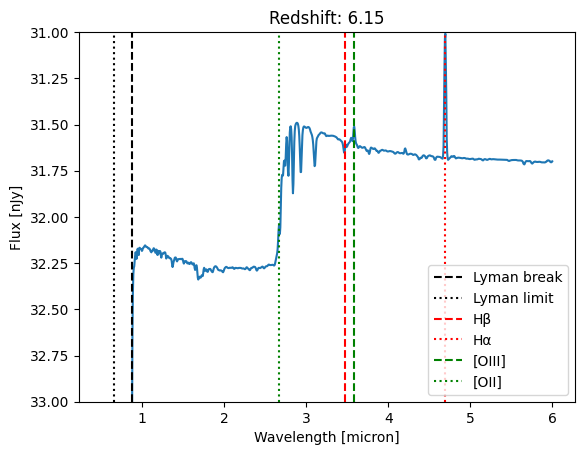

In [21]:
idx = 1

import matplotlib.pyplot as plt
import numpy as np

redshift = fitter.fitted_parameter_array[idx][0]
mass = fitter.fitted_parameter_array[idx][1]
plt.plot(wavs, -2.5*np.log10((1+redshift)*10**fitter.feature_array[idx]) + 31.4)
plt.gca().invert_yaxis()

print(f"Redshift: {redshift:.2f}, log10(M/Msun): {mass:.2f}")
plt.title(f"Redshift: {redshift:.2f}")
# Show Lyman break
plt.axvline(0.1216 * (1 + redshift), color='k', linestyle='--', label='Lyman break')
plt.axvline(0.0912 * (1 + redshift), color='k', linestyle=':', label='Lyman limit')
# Show Hb, Ha
plt.axvline(0.4861 * (1 + redshift), color='r', linestyle='--', label='Hβ')
plt.axvline(0.6563 * (1 + redshift), color='r', linestyle=':', label='Hα')
# Show OIII, OII
plt.axvline(0.5007 * (1 + redshift), color='g', linestyle='--', label='[OIII]')
plt.axvline(0.3727 * (1 + redshift), color='g', linestyle=':', label='[OII]')
plt.legend()
plt.xlabel("Wavelength [micron]")
plt.ylabel("Flux [nJy]")
plt.ylim(33, 31)

In [ ]:
from spectres.spectral_resampling_numba import spectres_numba

In [ ]:
run_model = SBI_Fitter.load_saved_model('/cosma/apps/dp276/dc-harv3/synference/models/Spectra_BPASS_Chab_Continuity_SFH_0.01_z_14_logN_4.4_Calzetti_v4_multinode')

2025-10-05 22:59:51,598 | synference | INFO     | Loaded model from /cosma/apps/dp276/dc-harv3/synference/models/Spectra_BPASS_Chab_Continuity_SFH_0.01_z_14_logN_4.4_Calzetti_v4_multinode/Spectra_BPASS_Chab_Continuity_SFH_0.01_z_14_logN_4.4_Calzetti_v4_multinode_20251005_171055_posterior.pkl.
2025-10-05 22:59:51,599 | synference | INFO     | Device: cpu
2025-10-05 22:59:59,403 | synference | INFO     | Loaded model from /cosma/apps/dp276/dc-harv3/synference/models/Spectra_BPASS_Chab_Continuity_SFH_0.01_z_14_logN_4.4_Calzetti_v4_multinode/Spectra_BPASS_Chab_Continuity_SFH_0.01_z_14_logN_4.4_Calzetti_v4_multinode_20251005_171055_posterior.pkl.
2025-10-05 22:59:59,404 | synference | INFO     | Device: cpu


Text(0, 0.5, 'Flux [nJy]')

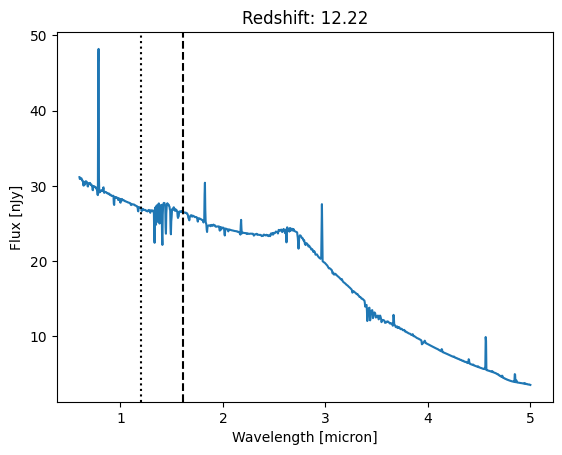

In [ ]:
idx = -2
run_model._X_test[idx]

import matplotlib.pyplot as plt
import numpy as np

wavs = np.linspace(0.6, 5.0, len(run_model._X_test[0])) * um
plt.plot(wavs, 10**run_model._X_test[idx])


redshift = run_model._y_test[idx][0]
plt.title(f"Redshift: {redshift:.2f}")
# Show Lyman break
plt.axvline(0.1216 * (1 + redshift), color='k', linestyle='--', label='Lyman break')
plt.axvline(0.0912 * (1 + redshift), color='k', linestyle=':', label='Lyman limit')
plt.xlabel("Wavelength [micron]")
plt.ylabel("Flux [nJy]")

In [ ]:
len(run_model.raw_observation_grid[:, 0])

4595

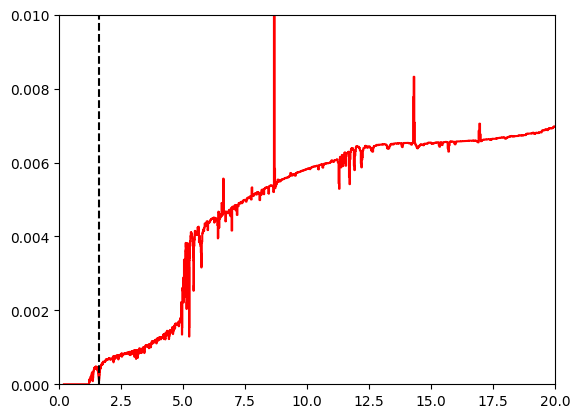

In [ ]:
rphot = run_model.raw_observation_grid[:, idx]
wavs = run_model.raw_observation_names * um
redshift = run_model._y_test[idx][0]

plt.step(wavs*(1+redshift), rphot, color='r', label='Observed photometry')
plt.xlim(0, 20)
plt.ylim(0, 0.01)

plt.axvline(0.1216 * (1 + redshift), color='k', linestyle='--', label='Lyman break')